In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [109]:
data = pd.read_csv('Salary.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [110]:
X = data['YearsExperience'].values
Y = data['Salary'].values

In [128]:
X_test,X_train,y_test,y_train = tts(X,Y,train_size=0.2)


(7,)

In [142]:
class Gradent_Regessor:
    def __init__(self,plot=None,learning_rate = 0.1, epoches = 100,mse = False):
        self.m = 0
        self.b = 0
        self.lr = learning_rate
        self.epoches = epoches
        self.plot = plot
        self.mse = mse

    def fit(self,X_train,y_train):
        for i in range(self.epoches):
            derivative_m = -2 * np.sum((y_train - self.m * X_train - self.b) * X_train)
            derivative_b = -2 * np.sum(y_train - self.m * X_train + self.b)
            

            step_size_m = self.lr * derivative_m
            step_size_b = self.lr * derivative_b
            
            self.m = self.m - step_size_m
            self.b = self.b - step_size_b

            y_pred = self.m * X_train + self.b

        



    def predict(self,X_test,plot = False):
        y_pred = self.m * X_test + self.b

        if plot == True:
            plt.scatter(X_test,y_test)
            plt.plot(X_test,y_pred)

        return y_pred

    def score(self,y_test,y_pred):
        print("Score",r2_score(y_test,y_pred))


In [143]:
gradent = Gradent_Regessor(plot='line_plot',learning_rate=0.0002,epoches=91)
gradent.fit(X_train,y_train)

Score 0.9760640953983215


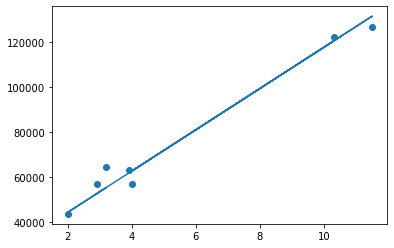

In [145]:
y_pred = gradent.predict(X_test,plot=True)
gradent.score(y_test,y_pred)